<a href="https://colab.research.google.com/github/hafsaaaaaaaa/MLPROJECT_/blob/main/random_forest_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df=sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
df.shape

(344, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Feature Engineering

**one hot encoding transforming categorical data into numeric**


In [9]:
df.sex.unique()

array(['Male', 'Female'], dtype=object)

In [10]:
pd.get_dummies(df['sex']).head()

,Female,Male
0,0,1
1,1,0
2,1,0
4,1,0
5,0,1


In [11]:
sex=pd.get_dummies(df['sex'],drop_first=True)
sex.head()

,Male
0,1
1,0
2,0
4,0
5,1


we have dropped the first column because only 1 column is sufficent to determine the gender of the penguins either will be male or female...male(1),female(0).

In [12]:

df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [13]:
pd.get_dummies(df['island']).head()

,Biscoe,Dream,Torgersen
0,0,0,1
1,0,0,1
2,0,0,1
4,0,0,1
5,0,0,1


here (1) is for torgersen and (0) for biscoe and dream ... if it is not dream it will not be biscoe either......

In [14]:
island=pd.get_dummies(df['island'],drop_first=True)
island.head(5)

,Dream,Torgersen
0,0,1
1,0,1
2,0,1
4,0,1
5,0,1


now we have 2 new feature sex and island so we will concatenate them with our dataset

In [15]:
new_data=pd.concat([df,island,sex],axis=1)
new_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Dream,Torgersen,Male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,1,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,1,1


In [16]:
new_data.drop(['sex','island'],axis=1,inplace=True);
new_data.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Dream,Torgersen,Male
0,Adelie,39.1,18.7,181.0,3750.0,0,1,1
1,Adelie,39.5,17.4,186.0,3800.0,0,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,1,1


creating separate target variables:

In [17]:
y=new_data.species
y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

In [18]:
y.unique()
y=y.map({'Adelie':0,'Chinstrap':1,'Gentoo':2})
y.head()

0    0
1    0
2    0
4    0
5    0
Name: species, dtype: int64

dropping the target variable= species

In [19]:
new_data.drop('species',inplace=True,axis=1)
new_data.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Dream,Torgersen,Male
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1


In [20]:
x=new_data

splitting the dataset in training and testing dataset

In [21]:
from sklearn.model_selection import train_test_split

# Assuming x and y are defined appropriately
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)


x_train (233, 7)
x_test (100, 7)
y_train (233,)
y_test (100,)


In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=5, criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

predicting the result

In [23]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0,
       2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 1, 0,
       0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2])

confusion Matrix


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score

In [25]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[48  0  0]
 [ 2 14  0]
 [ 0  0 36]]


Text(95.72222222222221, 0.5, 'Truth')

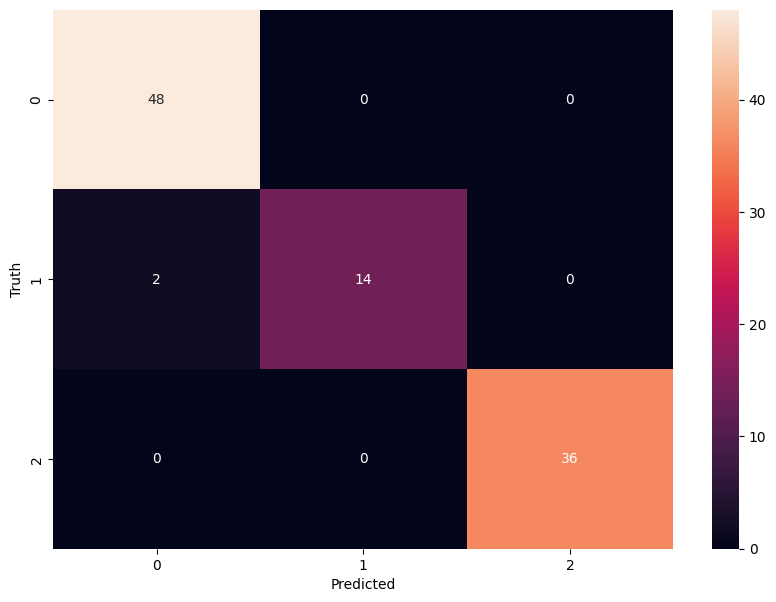

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
accuracy_score(y_test,y_pred)


0.98

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.88      0.93        16
           2       1.00      1.00      1.00        36

    accuracy                           0.98       100
   macro avg       0.99      0.96      0.97       100
weighted avg       0.98      0.98      0.98       100



Now try gini criteria

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=7, criterion='gini', random_state=0)
classifier.fit(x_train, y_train)


RandomForestClassifier(n_estimators=7, random_state=0)

In [29]:
y_pred=classifier.predict(x_test)

In [30]:
accuracy_score(y_test,y_pred)

0.99